In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df_comp = pd.read_csv("comp.csv")
df_comp = df_comp.sort_values(by=['bin', 'model'])
df_comp.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,model_id,bin,model,display_name
0,2024-05-19 08:46:25.467,game_episodes,2,159,1,159,1062.0,1151,37.129032,369,0,False,NaN,0.02,B1-long_100000_13_target_net,1.0,B1,1K
1,2024-05-19 08:46:26.833,game_episodes,2,387,2,228,1307.0,1409,31.311111,355,200,False,NaN,0.02,B1-long_100000_13_target_net,1.0,B1,1K
2,2024-05-19 08:46:28.072,game_episodes,2,593,3,206,1414.0,1512,36.878049,359,0,False,NaN,0.02,B1-long_100000_13_target_net,1.0,B1,1K
3,2024-05-19 08:46:29.023,game_episodes,2,752,4,159,1062.0,1151,37.129032,369,0,False,NaN,0.02,B1-long_100000_13_target_net,1.0,B1,1K
4,2024-05-19 08:46:30.045,game_episodes,2,922,5,170,809.0,898,26.411765,366,0,False,NaN,0.02,B1-long_100000_13_target_net,1.0,B1,1K


In [29]:
df_B1 = df_comp[df_comp['model'] == 'B1'].sort_values(by='bin')
df_B2 = df_comp[df_comp['model'] == 'B2'].sort_values(by='bin')
df_T1 = df_comp[df_comp['model'] == 'T1 discr ni'].sort_values(by='bin')

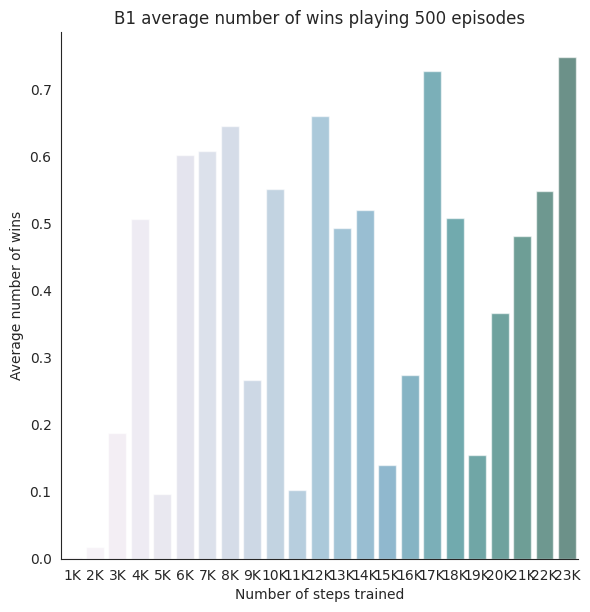

In [30]:
sns.set_style("white")
sns.catplot(data=df_B1, kind="bar", x="display_name", y="flag", errorbar=None, alpha=.6, hue='display_name', palette='PuBuGn', height=6).set(title="B1 average number of wins playing 500 episodes", xlabel="Number of steps trained", ylabel="Average number of wins")

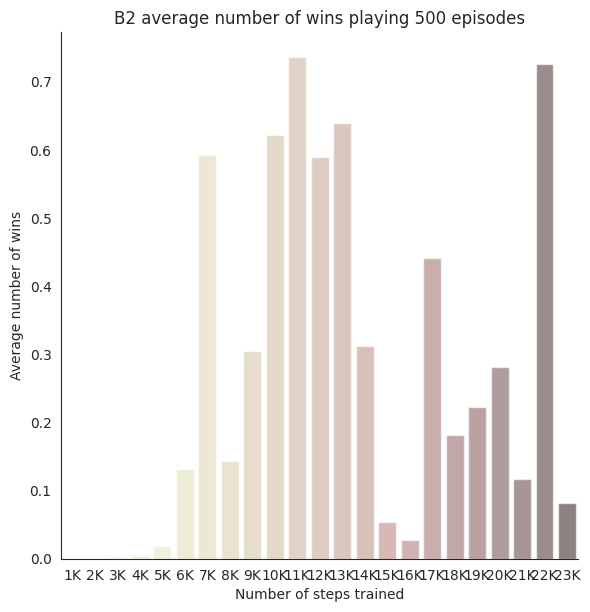

In [31]:
sns.set_style("white")
sns.catplot(data=df_B2, kind="bar", x="display_name", y="flag", errorbar=None, alpha=.6, hue='display_name', palette='pink_r', height=6).set(title="B2 average number of wins playing 500 episodes", xlabel="Number of steps trained", ylabel="Average number of wins")

<Figure size 2400x1000 with 0 Axes>

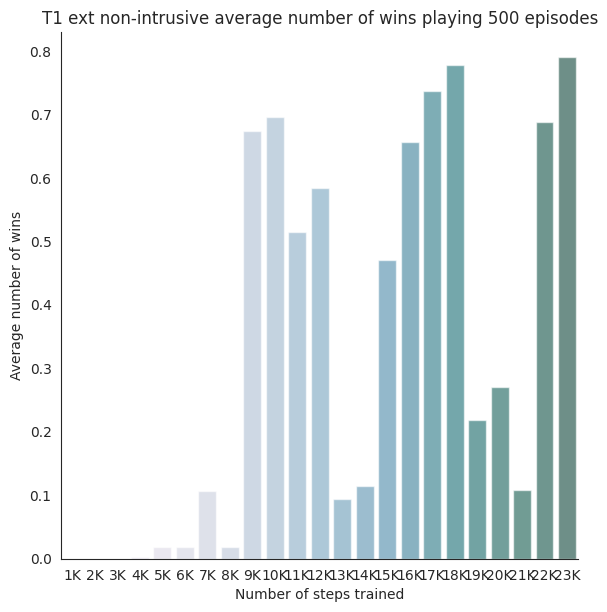

In [32]:
plt.figure(figsize=(24, 10))
sns.set_style("white")
sns.catplot(data=df_T1, kind="bar", x="display_name", y="flag", errorbar=None, alpha=.6, hue='display_name', height=6).set(title="T1 ext non-intrusive average number of wins playing 500 episodes", xlabel="Number of steps trained", ylabel="Average number of wins")

[Text(0.5, 1.0, 'B1 model performance playing 500 episodes'),
 Text(0.5, 0, 'reward'),
 Text(0, 0.5, 'number of steps trained')]

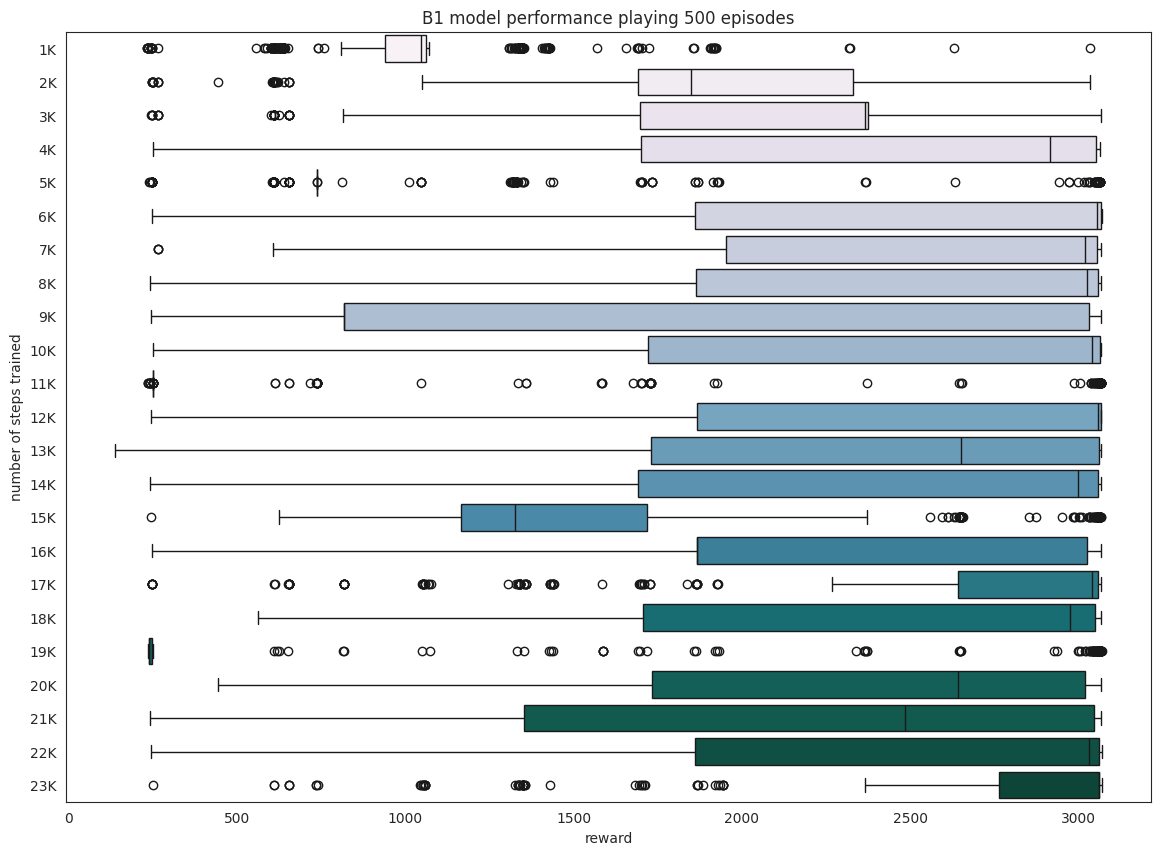

In [33]:
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette(palette='PuBuGn', desat=0.9, n_colors=23)
sns.boxplot(x ="reward", y="display_name", data = df_B1, hue="display_name", legend=False).set(title='B1 model performance playing 500 episodes', xlabel="reward", ylabel="number of steps trained")

[Text(0.5, 1.0, 'B2 model performance playing 500 episodes'),
 Text(0.5, 0, 'reward'),
 Text(0, 0.5, 'number of steps trained')]

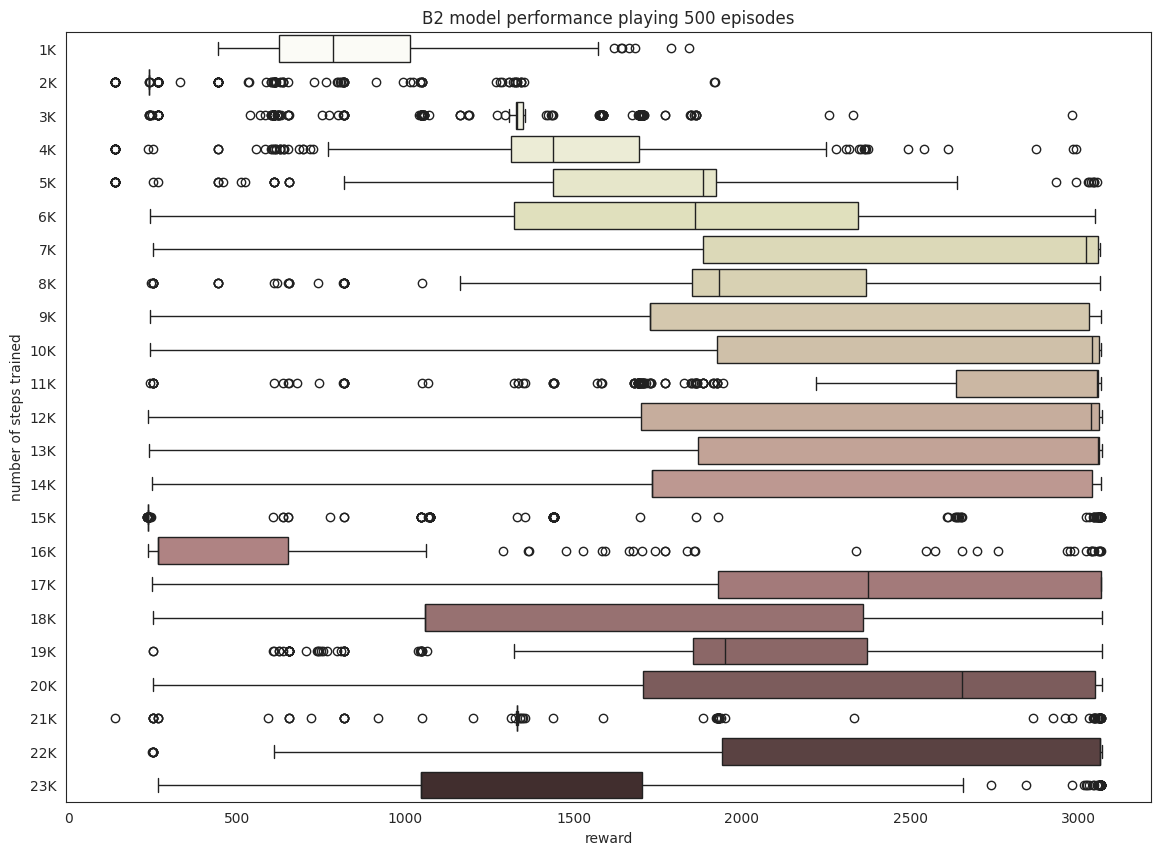

In [34]:
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette(palette='pink_r', desat=0.9, n_colors=23)
sns.boxplot(x ="reward", y="display_name", data = df_B2, hue="display_name", legend=False).set(title='B2 model performance playing 500 episodes', xlabel="reward", ylabel="number of steps trained")

[Text(0.5, 1.0, 'T1 ext non-intrusive model performance playing 500 episodes'),
 Text(0.5, 0, 'reward'),
 Text(0, 0.5, 'number of steps trained')]

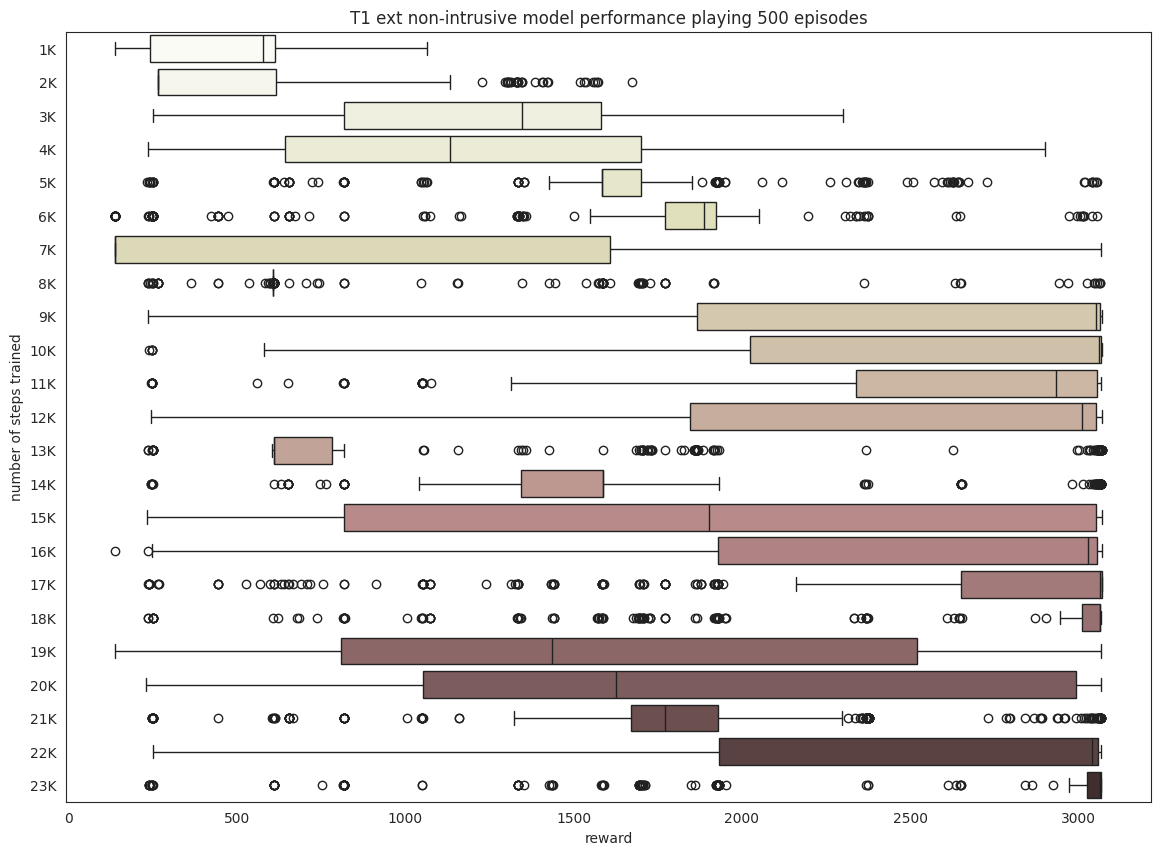

In [35]:
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.boxplot(x ="reward", y="display_name", data = df_T1, hue="display_name", legend=False).set(title='T1 ext non-intrusive model performance playing 500 episodes', xlabel="reward", ylabel="number of steps trained")

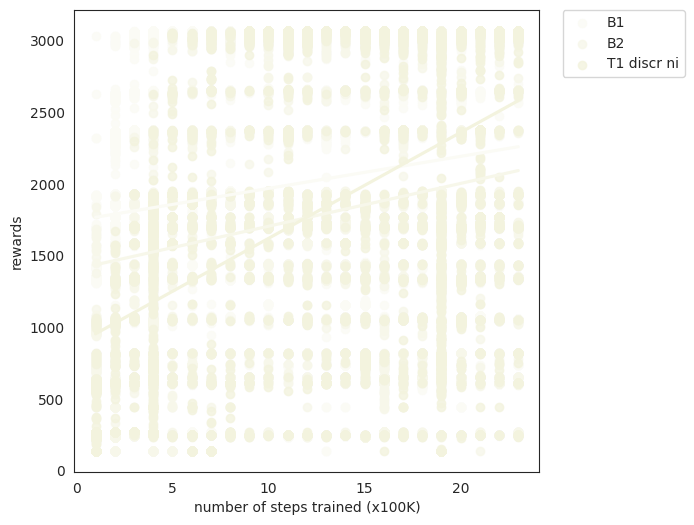

In [36]:
fig_reward, ax_reward = plt.subplots(figsize=(6, 6))
sns.regplot(x='bin', y='reward', data=df_B1, fit_reg=True, ci=None, ax=ax_reward, label='B1')
sns.regplot(x='bin', y='reward', data=df_B2, fit_reg=True, ci=None, ax=ax_reward, label='B2')
sns.regplot(x='bin', y='reward', data=df_T1, fit_reg=True, ci=None, ax=ax_reward, label='T1 discr ni')
ax_reward.set(ylabel='rewards', xlabel='number of steps trained (x100K)')
ax_reward.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [37]:
# create a histogram of the rewards. We expect this to match the nasty points in the game.

<Axes: xlabel='distance', ylabel='Count'>

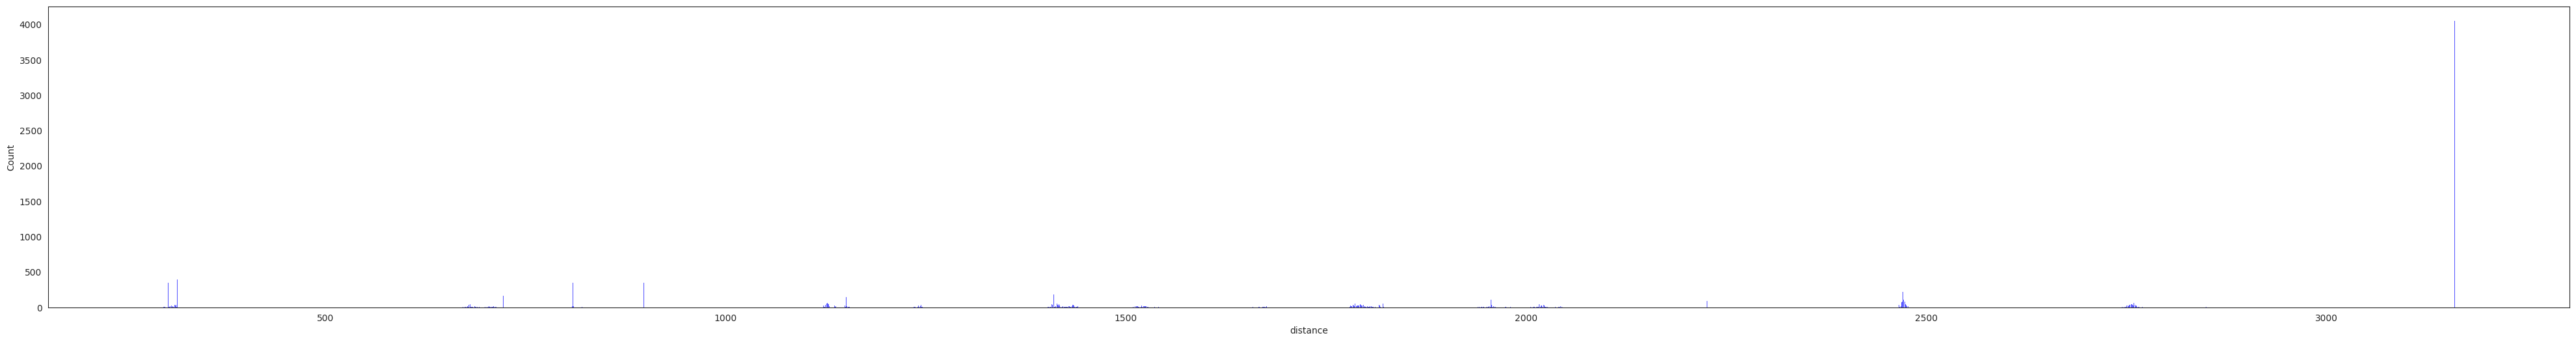

In [39]:
plt.figure(figsize=(50, 6))
sns.histplot(data=df_B1, x='distance', bins=3500, color='blue')